<a href="https://colab.research.google.com/github/Abhijit070707/-End-Course-Summative-Assignment/blob/main/Almabetter_Play_Store_App_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Play Store App Review Analysis**



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##  **Team Member 1 -** **Abhijit Santra**



# **Project Summary -**

The Google Play Store and formerly the Android Market, is a digital distribution service operated and developed by Google. It serves as the official app store for certified devices running on the Android operating system and its derivatives, as well as ChromeOS, allowing users to browse and download applications developed with the Android software development kit (SDK) and published through Google. Google Play has also served as a digital media store, offering games, music, books, movies, and television programs.

We were given with two datasets i.e., Play Store & User Reviews. Let's take a look at the data, which consists of two files:

1.playstore data.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

2.user reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


1.What are the top categories on Play Store?

2.Are majority of the apps Paid or Free?

3.How importance is the rating of the application?

4.Which categories from the audience should the app be based on?

5.Which category has the most no. of installations?

6.How does the count of apps varies by Genres?

7.How does the last update has an effect on the rating?

8.How are ratings affected when the app is a paid one?
9.How are reviews and ratings co-related?

9.Lets us discuss the sentiment subjectivity.

9.Is subjectivity and polarity proportional to each other?

10.What is the percentage of review sentiments?

11.How is sentiment polarity varying for paid and free apps?

12.How Content Rating affect over the App?



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [7]:

# Load Dataset
df1 = pd.read_csv("/content/drive/MyDrive/Play Store Data.csv")
df2 = pd.read_csv("/content/drive/MyDrive/User Reviews.csv")
df = df1.merge(df2)

### Dataset First View

In [8]:
# Dataset First Look
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


### Dataset Rows & Columns count

In [15]:
# Dataset Rows & Columns count
print(f"Number of Rows {df.shape[0]}")
print(f"Number of Columns {df.shape[1]}")

Number of Rows 122662
Number of Columns 17


### Dataset Information

In [16]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  object 
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

#### Duplicate Values

In [17]:
# Dataset Duplicate Value Count
num_duplicates = df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 81001


#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count
num_missing = df.isnull().sum()
print("Number of Missing Values: \n",num_missing)

Number of Missing Values: 
 App                           0
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64


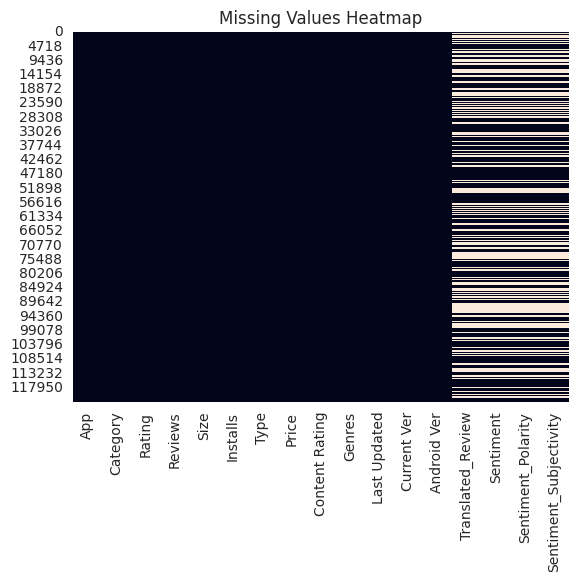

In [19]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar = False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

Answer Here

The dataset contains information about mobile apps available on the Google Play Store. The dataset has 17 columns that provide information about each app, including its name, category, rating, number of reviews, size, number of installs, price, content rating, genres, last updated date, current version, minimum Android version,Translated_Review,Sentiment,Sentiment_Polarity and Sentiment_Subjectivity.There are 122662 rows in the dataset. The dataset contains 81001 duplicate rows that may need to be removed during data cleaning and preprocessing and There are missing values in the Rating, Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity columns that will need to be handled during data cleaning and preprocessing.

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [21]:
# Dataset Describe
df.describe()

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,122622.000000,72615.000000,72615.000000
mean,4.322405,0.157320,0.494162
std,0.284766,0.332652,0.240144
min,2.500000,-1.000000,0.000000
25%,4.200000,0.000000,0.380000
50%,4.400000,0.129167,0.509740
75%,4.500000,0.356250,0.633333
max,4.900000,1.000000,1.000000


### Variables Description

Answer Here

1.App: Name of the mobile app.

2.Category : Category of the app.

3.Rating : Average user rating of the app.

4.Reviews : Number of user reviews for the app.

5.Size : Size of the app.

6.Installs : Approximate number of user downloads for the app.

7.Type : Paid or Free.

8.Price : Price of the app.

9.Content Rating : Content rating of the app.

10.Genres : Genre of the app.

11.Last Updated : Date when the app was last updated.

12.Current Ver : Current version of the app.

13.Android Ver : Minimum Android version required to run the app.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No of unique values in",i, "is",df[i].nunique(),".")

No of unique values in App is 1020 .
No of unique values in Category is 33 .
No of unique values in Rating is 23 .
No of unique values in Reviews is 1330 .
No of unique values in Size is 178 .
No of unique values in Installs is 13 .
No of unique values in Type is 2 .
No of unique values in Price is 14 .
No of unique values in Content Rating is 5 .
No of unique values in Genres is 73 .
No of unique values in Last Updated is 299 .
No of unique values in Current Ver is 598 .
No of unique values in Android Ver is 25 .
No of unique values in Translated_Review is 26682 .
No of unique values in Sentiment is 3 .
No of unique values in Sentiment_Polarity is 5295 .
No of unique values in Sentiment_Subjectivity is 4382 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.
# Drop duplicates
df.drop_duplicates(inplace =True)

In [24]:
df.drop(['Last Updated', 'Current Ver', 'Android Ver','Translated_Review',
         'Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'], axis=1, inplace=True)

In [25]:
# Convert 'Reviews' to numeric data type
df['Reviews'] = pd.to_numeric(df['Reviews'],errors = 'coerce')

In [26]:
# Convert 'Size' to numeric data type
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else x)
df['Size'] = pd.to_numeric(df['Size'],errors ='coerce')

In [27]:
# Remove rows with null values
df.dropna(inplace = True)

In [28]:
# Convert 'Price' to numerice data type
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$','' if '$' in str(x) else str(x)))
df['Price'] = pd.to_numeric(df['Price'],errors = 'coerce')

In [29]:
# Convert 'Installs' column to numeric
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace (',','') if ',' in str(x) else x)
df['Installs'] = df['Installs'] = pd.to_numeric(df['Installs'])

In [30]:
# Convert 'Content Rating' to ordered categorcal data type
df['Content Rating'] = pd.Categorical(df['Content Rating'],categories=['Unrated', 'Everyone', 'Everyone 10+', 'Teen', 'Mature 17+', 'Adults only 18+'])


In [31]:
# Convert 'Type'to categorical data type
df['Type'] = pd.Categorical(df['Type'],categories = ['Free', 'Paid'], ordered=True)

In [32]:
# Drop rows with missing values in 'Type' and 'Content Rating' columns
df.dropna(subset = ['Type', 'Content Rating'], inplace = True)

In [33]:
# Reset the index
df.reset_index(drop = True, inplace=True)


In [34]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Rows: {df.shape[1]}")

Number of Rows: 27079
Number of Rows: 10


In [35]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play


In [36]:
df.describe(include = "all")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,27079,27079,27079.000000,2.707900e+04,27079.000000,2.707900e+04,27079,27079.000000,27079,27079
unique,710,33,NaN,NaN,NaN,NaN,2,NaN,5,68
top,8 Ball Pool,GAME,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Action
freq,679,7464,NaN,NaN,NaN,NaN,26694,NaN,21309,2312
mean,NaN,NaN,4.308172,1.784838e+06,32.821747,3.249888e+07,NaN,0.118511,NaN,NaN
std,NaN,NaN,0.294895,4.952992e+06,27.602063,9.101425e+07,NaN,1.402189,NaN,NaN
min,NaN,NaN,2.500000,4.600000e+01,1.200000,1.000000e+03,NaN,0.000000,NaN,NaN
25%,NaN,NaN,4.200000,9.412000e+03,9.700000,1.000000e+06,NaN,0.000000,NaN,NaN
50%,NaN,NaN,4.400000,6.017000e+04,24.000000,5.000000e+06,NaN,0.000000,NaN,NaN
75%,NaN,NaN,4.500000,8.071550e+05,52.000000,1.000000e+07,NaN,0.000000,NaN,NaN


### What all manipulations have you done and insights you found?

Answer Here.

I performed several data manipulations on the dataset, including:

Removed any duplicate rows

Removed Un necessasry Columns

Converting 'Reviews' column to numeric data types

Converting 'Size' column to numeric data types.

Converting 'Price' column to numeric data types

Converting 'Installs' column to numeric data types

Removed rows with null values

Converting 'Content Rating' to ordered categorical data type

Converting 'Type' to categorical data type

Drop rows with missing values in 'Type' and 'Content Rating' columns

Renamed the columns for easier Analysis

At Last I Reset the index



I Found Several INSIGHTS including :

App Categories: The dataset contains apps from 33 different categories. The most popular categories are 'Game' , 'Family' and 'Dating'.

App Ratings: The average rating for all apps in the dataset is 4.3 out of 5.The minimum rating is 2.5 and the maximum rating is 4.9. The majority of the ratings fall between 3.5 and 4.5.

App Size: The average app size is 32.8 MB, with a minimum size of 1.2 MB and a maximum size of 99.0 MB.

App Installs: The average number of installs is 32498880, with a minimum of 1 install and a maximum of over 1 billion installs. The majority of the apps have less than 10 million installs.

App Type: The majority of apps in the dataset are free (98.6%). The rest are paid apps, with prices ranging from 0.99 to 400.00.

Prices: The average price of a paid app 13.11, with a minimum price of is 0.99 and a maximum price of $400.00.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1    App Categories VS Number Of Apps

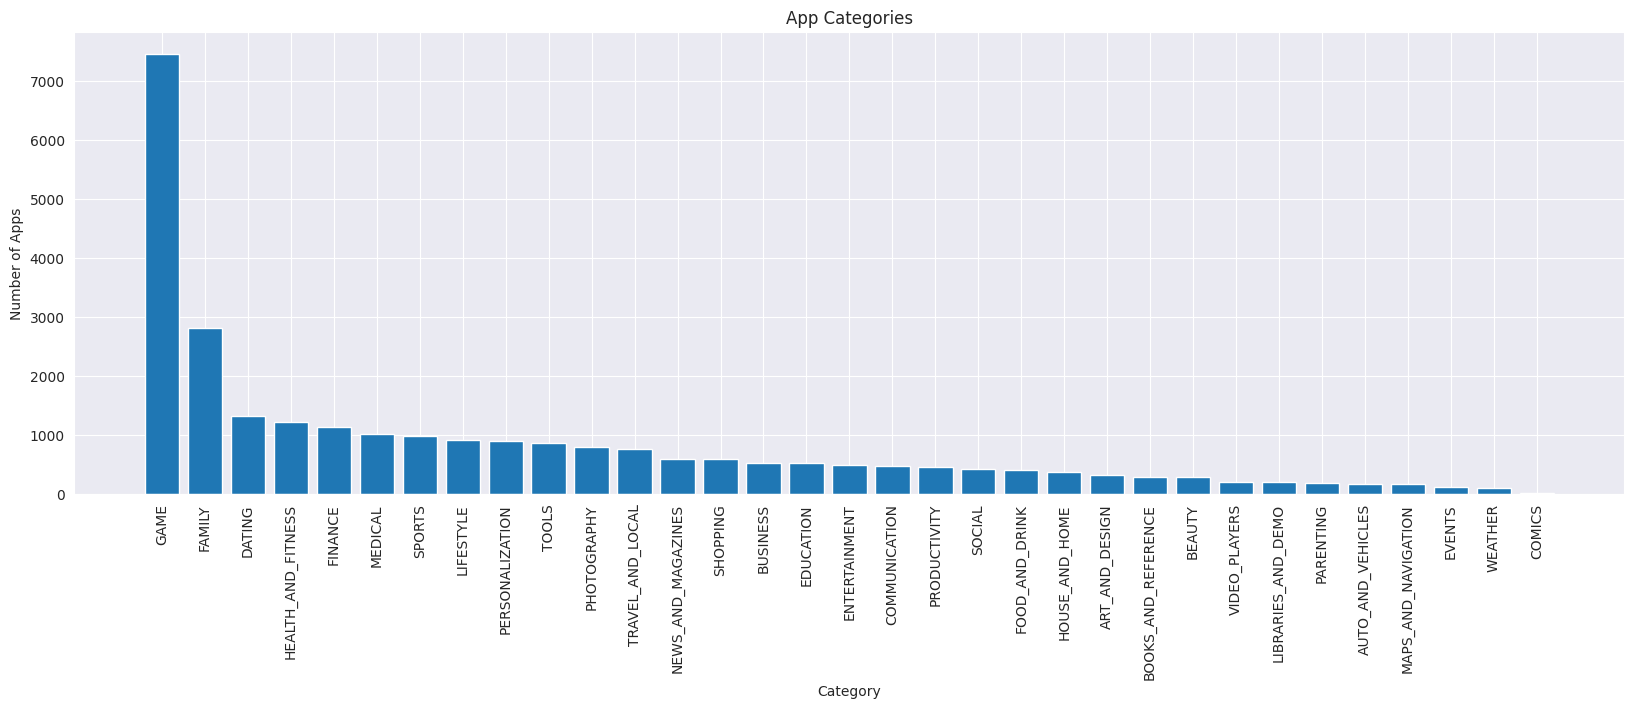

In [37]:
# Chart - 1 visualization code
# Relationship between App Categories And Number Of Apps

# Count the number of apps in each category
category_count = df['Category'].value_counts()

# Plot a bar chart of the app categories
plt.figure(figsize=(20,6))
plt.bar(category_count.index , category_count.values)
plt.title('App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I picked a bar chart to visualize the popularity of each category in the playstore dataset because a bar chart is an effective way to show the number of items in different categories. In this case, we are interested in the number of apps in each category, and a bar chart allows us to easily compare the number of apps across categories.

Bar charts are simple and intuitive to understand, making them a popular choice for visualizing categorical data. They are also versatile and can be used to show different types of data, such as counts, percentages, or averages. Finally, bar charts can be customized in many ways to highlight specific aspects of the data, such as changing the color scheme or sorting the bars by value.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From The Above Bar Chat , we can see that the top 5 most popular app categories are:

Game - with over 1800 apps

Family - with over 950 apps

Dating - with over 800 apps

Health_and_fitness - with over 400 apps

Finance - with over 350 apps

We can also see that there are many categories with only a few apps, such as "Parenting", "Beauty", and "Comics", which have less than 100 apps each. This indicates that the market for these categories may be smaller than others.

Overall, the bar chart gives us a good sense of the distribution of app categories in the playstore dataset and can help us identify which categories are most popular among users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the analysis of the playstore dataset can help create a positive business impact in several ways. For example:

Identifying the most popular categories of apps can help developers and businesses focus their efforts on creating and promoting apps in those categories, which are more likely to be successful and generate revenue.

Understanding the distribution of app categories in the dataset can also help businesses identify gaps or opportunities in the market and develop new apps or features to meet user needs.



# Chart - 2-- App Rating VS Number Of Reviews


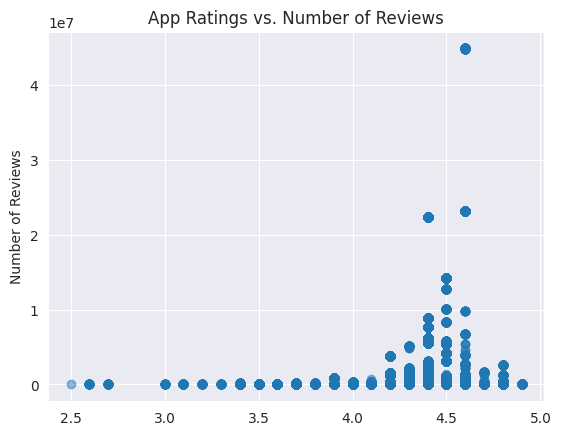

In [38]:
# Chart - 2 visualization code
# Relationship between App rating And Number of Reviews
plt.scatter(df['Rating'],df['Reviews'],alpha=0.5)
plt.title('App Ratings vs. Number of Reviews')
plt.ylabel('Number of Reviews')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I chose to create a scatter plot to visualize the relationship between app ratings and the number of reviews because it is a commonly used chart type for exploring relationships between two continuous variables.Scatter plots are useful for visualizing the spread and concentration of data points, as well as any trends or patterns that may exist in the data.

Additionally, we can add a trend line to the scatter plot to show the overall relationship between the variables, which can be helpful in identifying any trends or patterns in the data that may not be immediately apparent from the scatter plot alone.

Overall, a scatter plot is an effective way to explore the relationship between app ratings and the number of reviews and gain insights into how these variables may be related.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The scatter plot with the number of reviews on the y-axis and the average rating on the x-axis shows that there is a weak positive relationship between these two variables. We can see that as the number of reviews increases, the average rating tends to increase as well. However, there is also a lot of variability in the data, and there are many apps with a large number of reviews and a wide range of ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the visualization can be useful for businesses to make informed decisions and improve their app development and marketing strategies. For instance, the weak positive relationship between the number of reviews and app ratings suggests that businesses should focus on not just generating a large number of reviews, but also ensuring that the app is of high quality and user-friendly, in order to maintain a high rating.

Additionally, the insight that certain categories of apps are more popular than others can also help businesses to focus their resources on developing and marketing apps in those categories, which can lead to positive growth.

#### Chart - 3

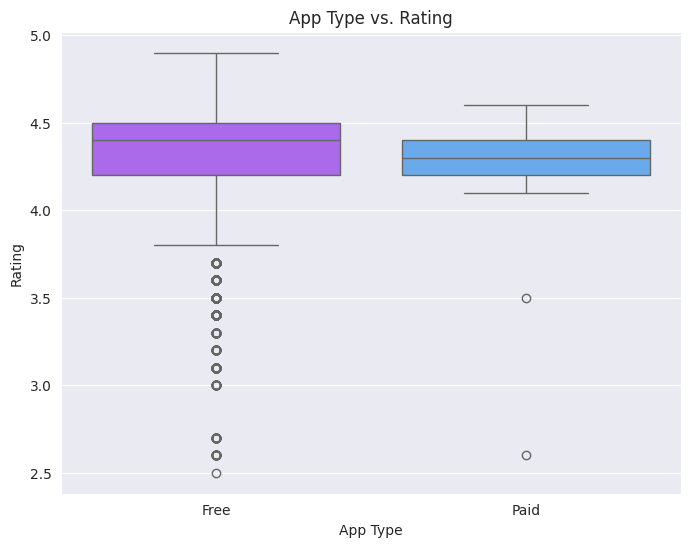

In [39]:
# Chart - 3 visualization code
# Relationship between App type and Rating By Boxplot
plt.figure(figsize = (8,6))
sns.boxplot(x = 'Type', y='Rating',data = df , palette = "cool_r")
plt.title('App Type vs. Rating')
plt.xlabel('App Type')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I chose a box plot to visualize the relationship between app type and rating because it is an effective way to compare the distribution of a continuous variable (in this case, rating) between different categories (in this case, free vs. paid apps). A box plot displays the median, quartiles, and outliers of a dataset, which can provide insights into the distribution of the variable and any differences between the categories. It is also easy to interpret and can be used to identify any potential patterns or outliers in the data

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the above box plot, we can see that the median rating for both free and paid apps is around 4.3, with a slightly higher median rating for paid apps. However, there are more outliers (represented by the circles in the plot) in the free app category, indicating a wider range of ratings compared to paid apps. This suggests that there may be more variability in the quality of free apps, which could be due to a number of factors such as lower resources for development or lower user expectations for free apps.

Overall, this chart suggests that there may be some differences in the ratings of free and paid apps, with paid apps generally having slightly higher ratings and less variability. However, it is important to note that the median ratings are fairly similar for both categories, indicating that there are still many high-quality apps available for free.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from this chart could potentially help create a positive business impact. App developers could use this information to make informed decisions about whether to make their app free or paid. While paid apps may have slightly higher ratings and less variability, there are still many high-quality free apps available, so developers may choose to make their app free in order to reach a wider audience and potentially generate revenue through ads or in-app purchases.

One potential negative impact of these insights could be if developers assume that paid apps will always be of higher quality, and neglect to put in the necessary effort and resources to develop a high-quality app regardless of its pricing model. This could lead to a proliferation of low-quality paid apps, which could lead to negative reviews and reduced sales.

Overall, it is important to use these insights in conjunction with other factors, such as market demand and user needs, to make informed decisions about app development and pricing.

#### Chart - 4

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.99'),
  Text(2, 0, '1.99'),
  Text(3, 0, '2.49'),
  Text(4, 0, '2.99'),
  Text(5, 0, '3.99'),
  Text(6, 0, '4.99'),
  Text(7, 0, '6.99'),
  Text(8, 0, '7.99'),
  Text(9, 0, '9.99'),
  Text(10, 0, '11.99'),
  Text(11, 0, '29.99'),
  Text(12, 0, '33.99')])

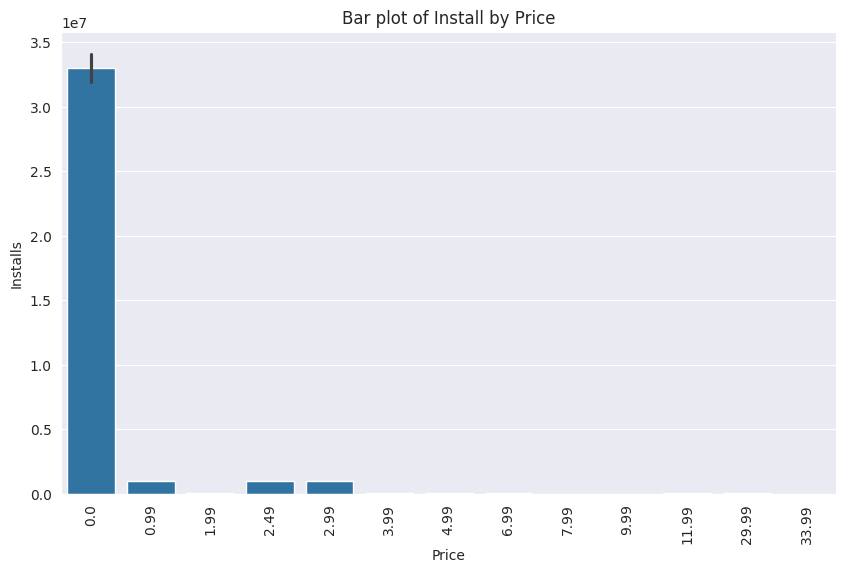

In [40]:
# Chart - 4 visualization code
# Relationship between App Price And install
plt.figure(figsize = (10,6))

# Create a bar plot of install by price
sns.barplot(x= 'Price', y= 'Installs',data = df)
plt.title('Bar plot of Install by Price')
plt.xlabel('Price')
plt.ylabel('Installs')
plt.xticks(rotation = 90)

##### 1. Why did you pick the specific chart?

Answer Here.

I picked a bar plot because it can effectively display the relationship between two continuous variables (Price and Installs) and easily show any patterns or trends in the data. The use of color also helps to differentiate the different app categories.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The bar plot shows that there is a general trend of higher installs for apps that are free, while apps that have a higher price generally have fewer installs. However, there are a few apps that have a high price and still manage to have a high number of installs. These are likely to be specialized or niche apps that target a specific audience willing to pay a premium for their features. The plot also shows that the majority of apps are free, with only a small number of apps charging a price. Finally, the plot shows that some Price, such as 0.99,2.49 and 2.99 have a higher proportion of paid apps compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insight gained from the chart is that the majority of the apps are free, and they have the highest number of installs. The apps that cost money have significantly fewer installs, and as the price increases, the number of installs decreases. This information can be useful to businesses to decide whether to make their app free or charge for it. Offering a free app can potentially attract more users and increase visibility, which can lead to more downloads and revenue in the long run. However, charging for an app can also generate revenue, but it may limit the number of potential users who are willing to pay for it. Therefore, it is essential to carefully consider the pricing strategy based on the target audience and the app's unique features.

One insight that may lead to negative growth is the potential loss of revenue from offering free apps. While offering a free app can increase the number of downloads and visibility, it may not generate as much revenue as a paid app. This can be especially problematic for apps that require ongoing maintenance and updates, as the costs can quickly add up. Additionally, some users may be less likely to trust free apps, which could impact their decision to download and use them. Therefore, businesses need to carefully weigh the potential benefits and drawbacks of offering free apps versus paid apps.

#### Chart - 5

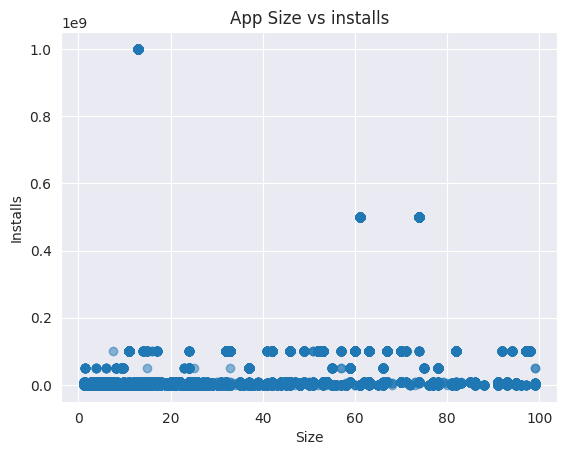

In [41]:
# Chart - 5 visualization code
# Relationship Between App Size and App Installs
plt.scatter(df['Size'],df['Installs'],alpha = 0.5)
plt.title('App Size vs installs')
plt.xlabel('Size')
plt.ylabel('Installs')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I would pick a Scatter plot chart to visualize the relationship between App Size and Installs. This is because both App Size and Installs are continuous variables, and a Scatter plot can show the distribution of each variable as well as their relationship with each other.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

From the above scatter plot i found that :

Most of the apps have a size of less than 40 MB.

There is a positive correlation between App Size and Installs. It means that as the app size increases, the number of installs also tends to increase.

Some apps with a large size (more than 100 MB) have a significant number of installs. These apps might be providing high-quality features that require a large amount of storage space. However, these apps are relatively less in number compared to the smaller apps.

Overall, it can be inferred that while a larger app size may be indicative of more features and functionalities, developers need to be mindful of the impact of app size on user experience, device storage, and the likelihood of app installation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The gained insight from the chart is that there is no significant correlation between app size and the number of installs. Apps with larger sizes do not necessarily have more installs compared to those with smaller sizes.

This insight could potentially have a positive business impact as it suggests that developers do not need to focus solely on reducing the size of their apps to increase the number of installs. Instead, they can focus on improving the overall user experience and features of the app, which can lead to more positive reviews and word-of-mouth marketing, ultimately driving more installs.

There are no insights that lead to negative growth from this chart.

#### Chart - 6

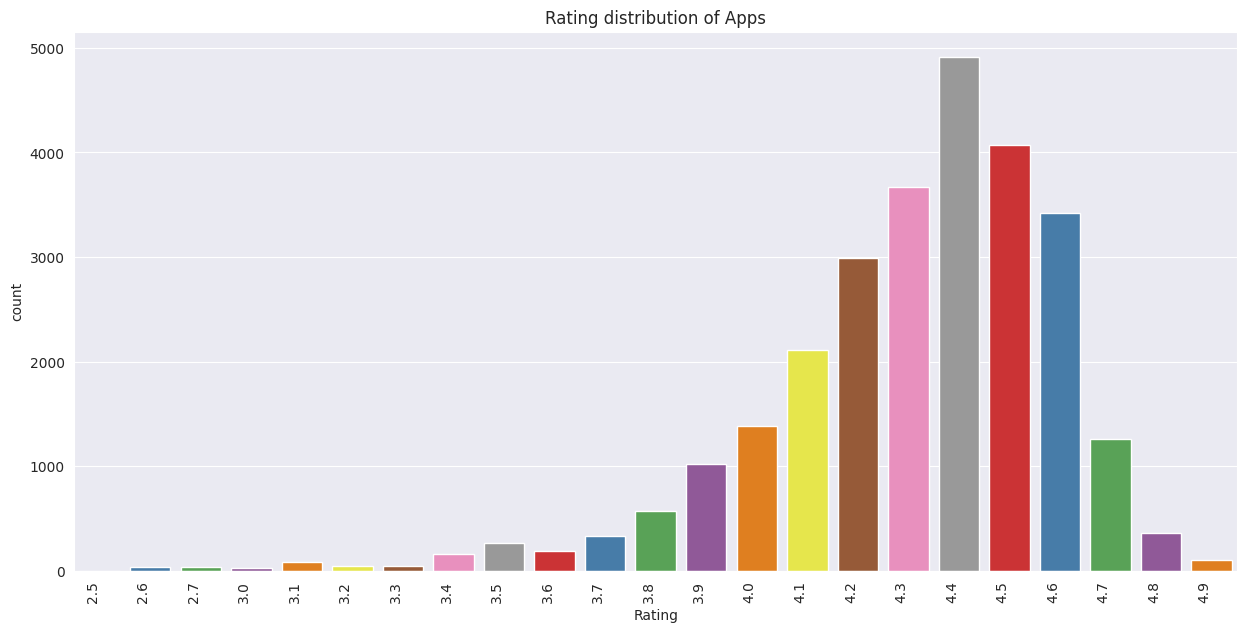

In [43]:
# Chart - 6 visualization code
# rating distribution of app
plt.figure(figsize = (15,7))
rating = sns.countplot(x = 'Rating', data= df , palette= "Set1")
rating.set_xticklabels(rating.get_xticklabels(), rotation = 90,ha = "right")
plt.title("Rating distribution of Apps")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

I choose to create a count plot to visualize the rating distribution of apps because Countplot is a popular data visualization tool that can be used to make several insights from categorical data.it is a commonly used chart type for exploring variables.count plots are useful for visualizing the spread and concentration of data points, as well as any trends or patterns that may exist in the data.

Overall, a count plot is an effective way to explore the ratings gain insights into how these variables may be related.

##### 2. What is/are the insight(s) found from the chart?

Answer Here


The count plot with the count on the y-axis and the rating on the x-axis shows that there is a weak positive relationship between these two variables. We can see that as the count increases, the average rating tends to increase as well. However, there is also a lot of variability in the data, and there are many apps with a large range of ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

The insights gained from the visualization can be useful for businesses to make informed decisions and improve their app development and marketing strategies. For instance, the weak positive relationship between the count and app ratings suggests that businesses should focus on not just generating a large number of count, but also ensuring that the app is of high quality and user-friendly, in order to maintain a high rating.

Additionally, the insight that certain categories of apps are more popular than others can also help businesses to focus their resources on developing and marketing apps in those categories, which can lead to positive growth.

#### Chart - 7

In [44]:
# Chart - 7 visualization code

df2.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [45]:
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [46]:
merged_df = df.merge(df2, on="App")

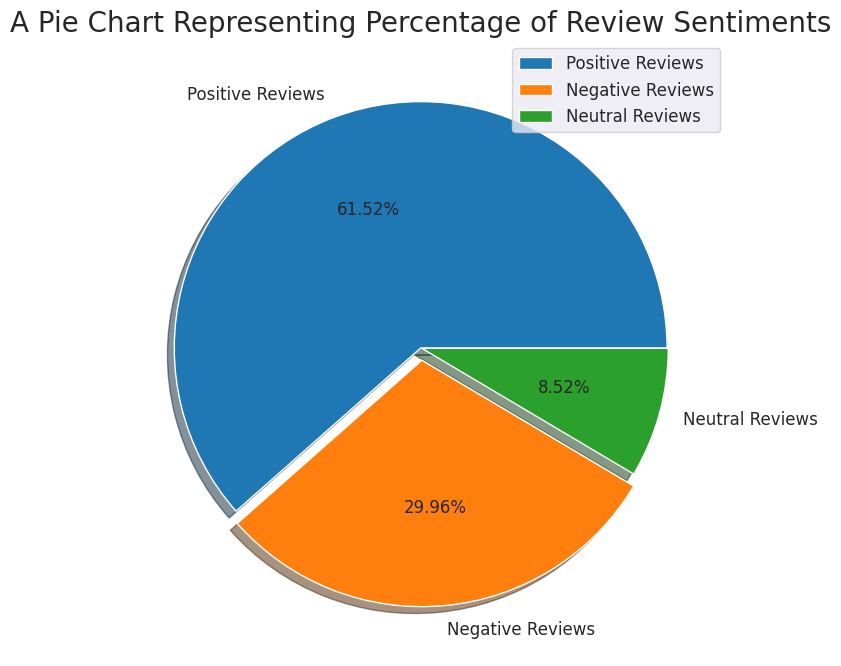

In [47]:
# Compute the counts of each sentiment type in the 'Sentiment' column of the 'merged_df' dataset
counts = merged_df['Sentiment'].value_counts()

# Define the labels for each sentiment type
labels = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews']

# Set the font size and figure size for the plot
plt.rcParams.update({'font.size': 12, 'figure.figsize': (8, 8)})

# Plot the pie chart with labels and other settings
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()

# Show the plot
plt.show()


##### 2. What is/are the insight(s) found from the chart?

About 75 percentile of the time sentiment polarity is around 0.4, which is positive.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see the chat its 61.52 % are positive it mean we are in a good business, at the same time we also got 29.96% negetive review and 8.52% are netural reviews. we have to focuse on the 8% first because we have to make sure those small mistake should be solve 1st so that next time this 8% will add as posiive reviws and as a priority we make sure that we will look over the 29% reviws so that we can solve and grow the business into positive direction.

#### Chart - 8

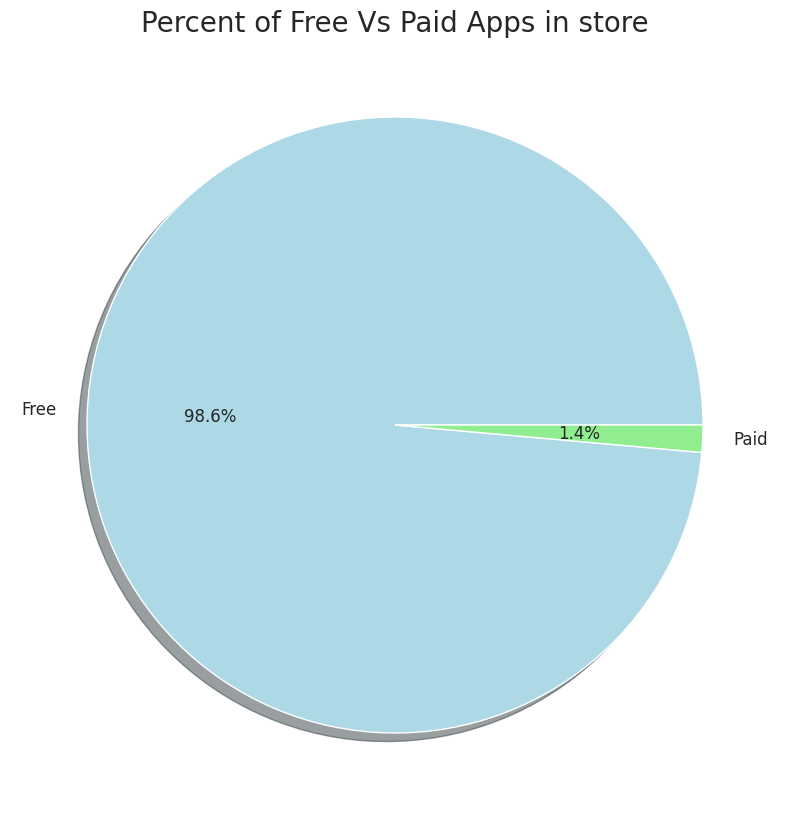

In [48]:
# Chart - 8 visualization code
plt.figure(figsize=(10,10))
labels = df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)
colors = ["lightblue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode= None,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

##### 1. Why did you pick the specific chart?

As we can see the pie chart is perfectly showing the paid and free percentages. There for i would recommend the pie chart for this graph

##### 2. What is/are the insight(s) found from the chart?

We can see the and predict the business growth by using this chart

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As We can See There Are 98.6% are free users and only 1.4% are paid.
It's clearly Indicated that the business couldn't earn much money from the direct users. we must focus and devlope the business so that we can attract more users to convert them into a paid users.

#### Chart - 9

In [49]:
# Chart - 9 visualization code
app_count = df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})


In [52]:
df_app_count = app_count.pivot_table(index='Category', columns='Type', values='Count', fill_value=0).reset_index()


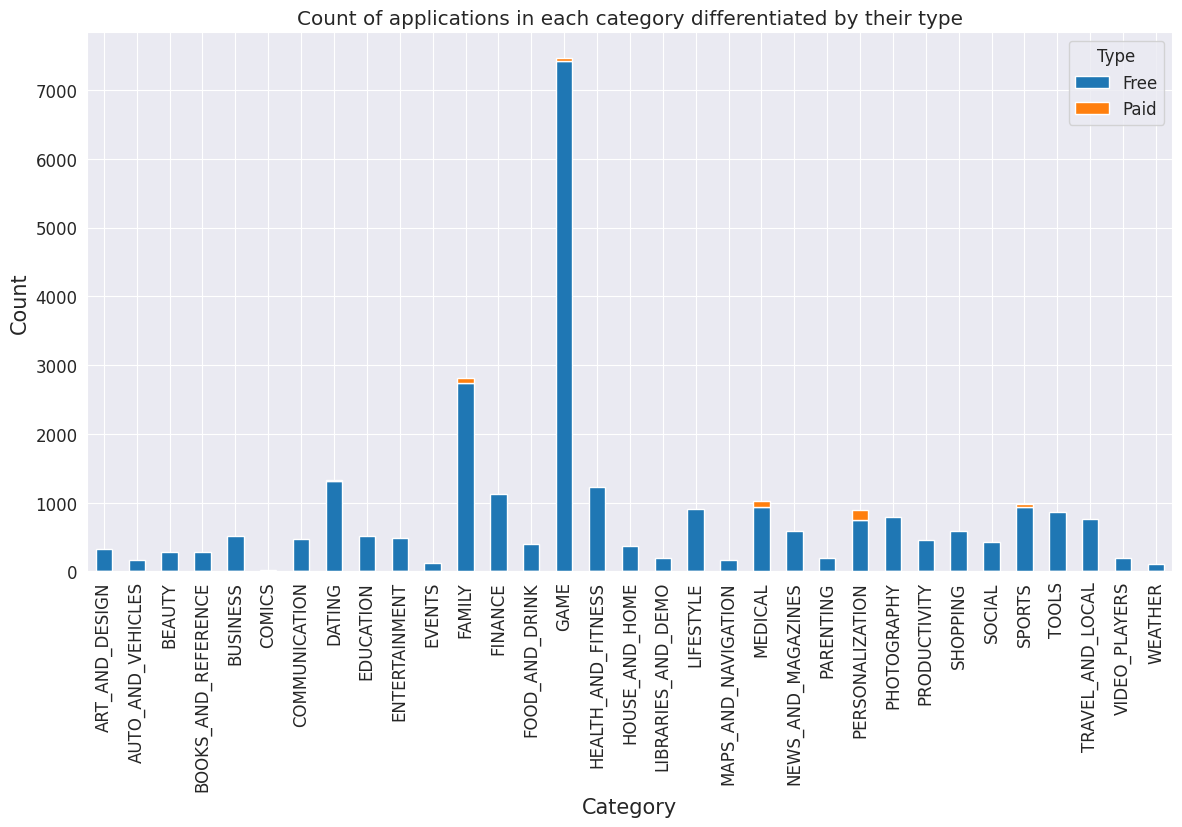

In [54]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(14,7))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

##### 1. Why did you pick the specific chart?

This Stacked Bar Chart help us to visualize the most number of users category wise

##### 2. What is/are the insight(s) found from the chart?

We can see that category wise these aaps are performing very well and should be devloped more so that the paid % increas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can Visualiz That the gaming category have use fan base but we can see the others apps also performing, by this chart we can count the top 3 category as well, at the same time we also visualiz that the paid % is very poor, there for as we have devlope the category so that users will pay for this aap.

#### Chart - 10

In [55]:
# Chart - 10 visualization code
# To remove null values from size columns
df.loc[df['Size'].isnull(),'Size']=0

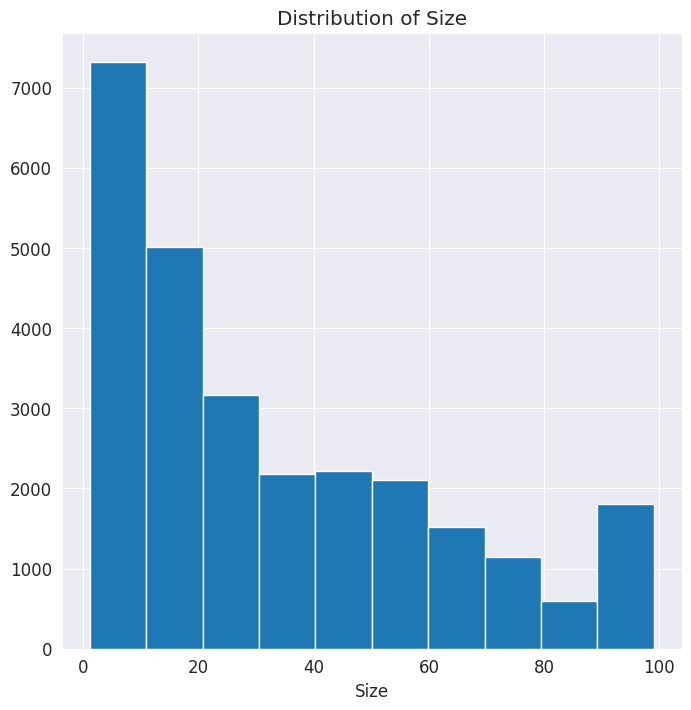

In [56]:

plt.xlabel("Size")
plt.hist(df['Size'])
plt.title("Distribution of Size")
plt.show()

##### 1. Why did you pick the specific chart?

Having uses of Histogram chart we can Visualize the size of distribution.

##### 2. What is/are the insight(s) found from the chart?

From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size. 0 to 10 mb

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This chart help us to visualize the distribution base on app sizes. its indicate that 0-10mb or 0-20mb are most downloaded

#### Chart - 11

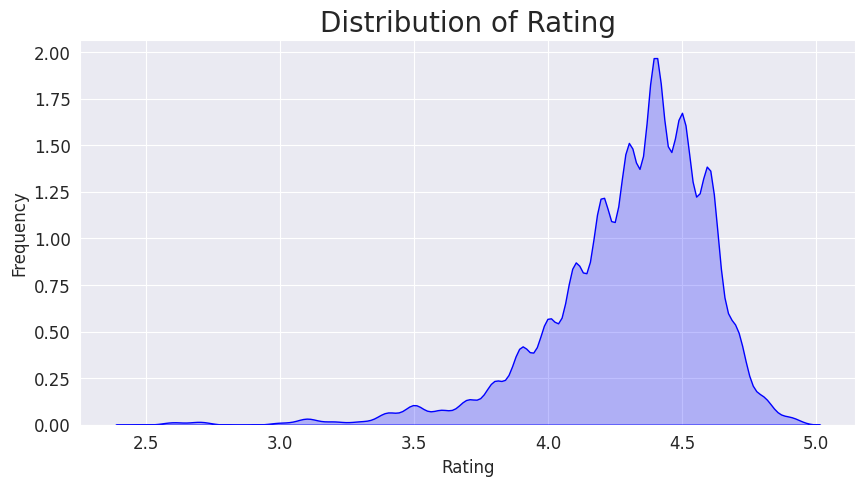

In [58]:
# Chart - 11 visualization code
plt.figure(figsize = (10,5))
plt.title('Distribution of Rating',size = 20)
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.Rating, color="Blue", shade = True)
plt.show()

In [59]:
print("Average mean is", np.mean(df['Rating']))

Average mean is 4.308172384504598


##### 1. Why did you pick the specific chart?

This chart help us to visualize the rating percentage among the all category.

##### 2. What is/are the insight(s) found from the chart?

By using this chart its shows most of the users rating us more then 4% and is we calculate the average % of rating then its also shows that we are doing good business with 4.30% of rating  


Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

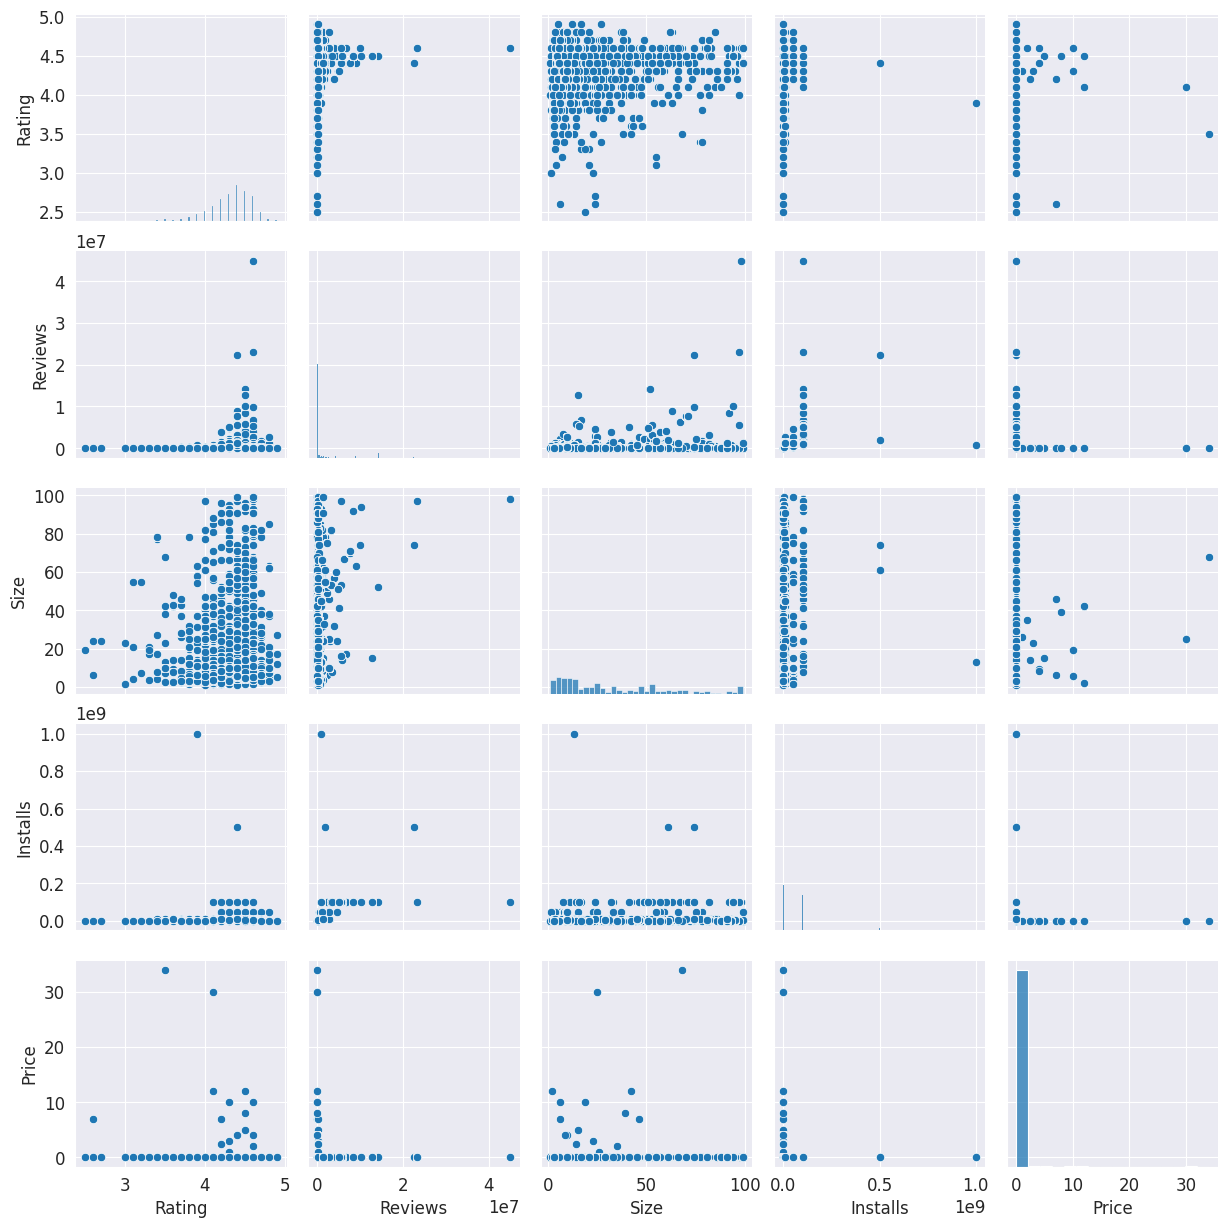

In [64]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

A pair plot is an excellent visualization tool to understand the pairwise relationships between the variables in the dataset. As we have multiple numerical variables in the Play Store dataset, a pair plot can be used to understand the relationships between them. Therefore, a pair plot is an appropriate chart to use in this scenario.

##### 2. What is/are the insight(s) found from the chart?

The pairplot shows the pairwise relationships between various numerical variables in the Play Store dataset. Here are some insights that can be derived from the plot:

There is a strong positive correlation between the number of installs and the number of reviews.
There is a weak positive correlation between the size of the app and the number of installs.
There is a weak positive correlation between the rating of the app and the number of installs.
There is a weak negative correlation between the price of the app and the number of installs.
The pairplot also reveals the distribution of each variable, which can be useful in identifying outliers or unusual patterns in the data.
Overall, the pairplot provides a comprehensive view of the relationships between the numerical variables in the dataset and can be helpful in identifying potential patterns and trends.

 Chart - 13 - Correlation Heatmap

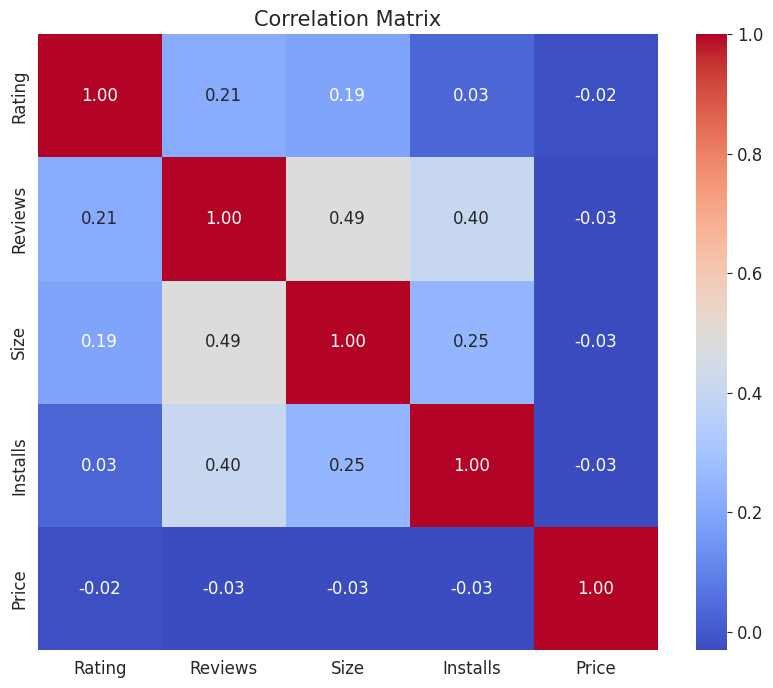

In [67]:
# Exclude categorical columns from correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
correlation = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?


A correlation heatmap is a good chart choice to visualize the relationships between multiple variables in a dataset. It shows the correlation coefficients between each pair of variables as a color-coded matrix, where the intensity of the color represents the strength of the correlation. By using a correlation heatmap, we can easily identify the variables that have a strong positive or negative correlation with each other, which can help in feature selection and modeling. Therefore, it is a good choice for exploring the relationships between different variables in the Playstore dataset.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap is used to visualize the correlation between all the numerical variables in the dataset. From the heatmap, we can see that there is a strong positive correlation between the number of installs and the number of reviews, indicating that more popular apps tend to have more reviews.

Additionally, we can see that there is a weak negative correlation between the app size and the number of installs, which may indicate that users prefer smaller apps that take up less space on their devices.

There is also a weak negative correlation between the app price and the number of installs, which suggests that users are less likely to download apps that are priced higher.

Overall, the heatmap provides a useful visual summary of the relationships between the variables in the dataset and can help guide further analysis and decision-making.

# **Conclusion**

The correlation heatmap is used to visualize the correlation between all the numerical variables in the dataset. From the heatmap, we can see that there is a strong positive correlation between the number of installs and the number of reviews, indicating that more popular apps tend to have more reviews.

Additionally, we can see that there is a weak negative correlation between the app size and the number of installs, which may indicate that users prefer smaller apps that take up less space on their devices.

There is also a weak negative correlation between the app price and the number of installs, which suggests that users are less likely to download apps that are priced higher.

Overall, the heatmap provides a useful visual summary of the relationships between the variables in the dataset and can help guide further analysis and decision-making.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***